In [1]:
import pandas as pd

%matplotlib inline

In [2]:
players = pd.read_csv('players.csv')
matches = pd.read_csv('match.csv')
heroes = pd.read_csv('hero_names.csv')
items = pd.read_csv('item_ids.csv')
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   item_id    189 non-null    int64 
 1   item_name  189 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.1+ KB


In [3]:
hero_lookup = dict(zip(heroes['hero_id'], heroes['localized_name']))
hero_lookup[0] = 'Unknown'
players['hero'] = players['hero_id'].apply(lambda _id: hero_lookup[_id])

In [4]:
item_lookup = dict(zip(items['item_id'], items['item_name']))
item_lookup[0] = 'Unknown'

def find_item(_id):
    return item_lookup.get(_id, 'u_' + str(_id))

players['item_0'] = players['item_0'].apply(find_item)
players['item_1'] = players['item_1'].apply(find_item)
players['item_2'] = players['item_2'].apply(find_item)
players['item_3'] = players['item_3'].apply(find_item)
players['item_4'] = players['item_4'].apply(find_item)
players['item_5'] = players['item_5'].apply(find_item)

In [5]:
player_heroes = pd.get_dummies(players['hero'])
player_heroes

,Abaddon,Alchemist,Ancient Apparition,Anti-Mage,Axe,Bane,Batrider,Beastmaster,Bloodseeker,Bounty Hunter,...,Venomancer,Viper,Visage,Warlock,Weaver,Windranger,Winter Wyvern,Witch Doctor,Wraith King,Zeus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499998,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
item0 = pd.get_dummies(players['item_0'].fillna(0))
item1 = pd.get_dummies(players['item_1'].fillna(0))
item2 = pd.get_dummies(players['item_2'].fillna(0))
item3 = pd.get_dummies(players['item_3'].fillna(0))
item4 = pd.get_dummies(players['item_4'].fillna(0))
item5 = pd.get_dummies(players['item_5'].fillna(0))

In [7]:
player_items = item0 \
    .add(item1, fill_value=0) \
    .add(item2, fill_value=0) \
    .add(item3, fill_value=0) \
    .add(item4, fill_value=0) \
    .add(item5, fill_value=0)


In [8]:
radiant_cols = list(map(lambda s: 'radiant_' + s, player_heroes.columns.values))
dire_cols = list(map(lambda s: 'dire_' + s, player_heroes.columns.values))

In [9]:
radiant_items_cols = list(map(lambda s: 'radiant_' + str(s), player_items.columns.values))
dire_items_cols = list(map(lambda s: 'dire_' + str(s), player_items.columns.values))

In [10]:
from os.path import isfile

X = None

radiant_heroes = []
dire_heroes = []
radiant_items = []
dire_items = []

for _id, _index in players.groupby('match_id').groups.items():
    radiant_heroes.append(player_heroes.iloc[_index][:5].sum().values)
    dire_heroes.append(player_heroes.iloc[_index][5:].sum().values)
    radiant_items.append(player_items.iloc[_index][:5].sum().values)
    dire_items.append(player_items.iloc[_index][5:].sum().values)

radiant_heroes = pd.DataFrame(radiant_heroes, columns=radiant_cols)
dire_heroes = pd.DataFrame(dire_heroes, columns=dire_cols)
radiant_items = pd.DataFrame(radiant_items, columns=radiant_items_cols)
dire_items = pd.DataFrame(dire_items, columns=dire_items_cols)
X = pd.concat([radiant_heroes, radiant_items, dire_heroes, dire_items], axis=1)
# X.to_csv('mapped_match_hero_item.csv', index=False)

In [11]:
X.head()

,radiant_Abaddon,radiant_Alchemist,radiant_Ancient Apparition,radiant_Anti-Mage,radiant_Axe,radiant_Bane,radiant_Batrider,radiant_Beastmaster,radiant_Bloodseeker,radiant_Bounty Hunter,...,dire_vanguard,dire_veil_of_discord,dire_vitality_booster,dire_vladmir,dire_void_stone,dire_ward_dispenser,dire_ward_observer,dire_ward_sentry,dire_wraith_band,dire_yasha
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [12]:
y = matches['radiant_win'].apply(lambda win: 1 if win else 0)
classes = ['Dire Win', 'Radiant Win']

In [13]:
_ = pd.Series(y).apply(lambda i: classes[i]).value_counts()

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(45000, 612) (45000,)
(5000, 612) (5000,)


In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
import numpy as np
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

In [30]:
model = tf.keras.Sequential([
  Dense(256, activation='relu', input_shape=(612,)),  
  Dense(256, activation='relu'), 
  Dense(128, activation='relu'), 
  Dropout(0.7),
  Dense(256, activation='relu'), 
  Dense(128, activation='relu'), 
  Dropout(0.5),
  Dense(1, activation='sigmoid'),
])

optimizer = Adam(lr=0.001)

model.compile(optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 256)               156928    
_________________________________________________________________
dense_19 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_20 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_22 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

In [31]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
history = model.fit(X_train, y_train, batch_size=200, verbose=2, epochs=100, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/100
225/225 - 1s - loss: 0.1532 - accuracy: 0.9340 - val_loss: 0.0858 - val_accuracy: 0.9636
Epoch 2/100
225/225 - 1s - loss: 0.0864 - accuracy: 0.9659 - val_loss: 0.0772 - val_accuracy: 0.9702
Epoch 3/100
225/225 - 1s - loss: 0.0712 - accuracy: 0.9716 - val_loss: 0.0810 - val_accuracy: 0.9666
Epoch 00003: early stopping


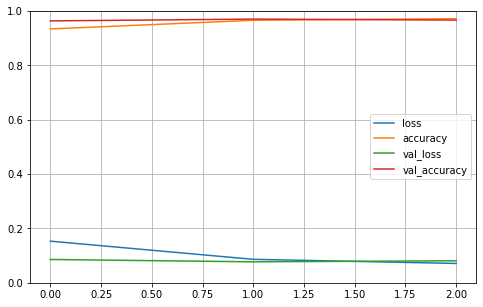

In [32]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

In [43]:
def predict_match(ind, dset=X_train):
    tst = np.array([dset.iloc[ind]])
    chance = model.predict(tst)
    xt = dset.iloc[ind] 
    rs = xt.to_numpy().nonzero()
    heroes = xt.iloc[rs]
    return list(heroes.index), chance

In [47]:
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
for i in range(10,20):
    h, c = predict_match(i, X_test)
    print(h)
    print(c)
    print('\n')

['radiant_Juggernaut', 'radiant_Legion Commander', 'radiant_Mirana', 'radiant_Omniknight', 'radiant_Sand King', 'radiant_Unknown', 'radiant_abyssal_blade', 'radiant_arcane_boots', 'radiant_bfury', 'radiant_blade_of_alacrity', 'radiant_blink', 'radiant_bottle', 'radiant_desolator', 'radiant_dust', 'radiant_invis_sword', 'radiant_lesser_crit', 'radiant_maelstrom', 'radiant_magic_wand', 'radiant_mask_of_madness', 'radiant_mekansm', 'radiant_ogre_axe', 'radiant_point_booster', 'radiant_power_treads', 'radiant_rapier', 'radiant_sange_and_yasha', 'radiant_slippers', 'radiant_vladmir', 'radiant_ward_observer', 'dire_Bloodseeker', 'dire_Necrophos', 'dire_Rubick', 'dire_Templar Assassin', 'dire_Tusk', 'dire_Unknown', 'dire_arcane_boots', 'dire_blade_mail', 'dire_blink', 'dire_boots', 'dire_crimson_guard', 'dire_desolator', 'dire_ghost', 'dire_greater_crit', 'dire_invis_sword', 'dire_magic_stick', 'dire_mekansm', 'dire_null_talisman', 'dire_point_booster', 'dire_power_treads', 'dire_radiance', '

In [68]:
ops = [predict_match(11, X_test), predict_match(12, X_test), predict_match(19, X_test)] 
rheroes = ops[0][0][:5]
ritems = ops[0][0][5:26]
dheroes = ops[0][0][26:31]
ditems = ops[0][0][31:]
win = ops[0][1]

rheroes = [x.split('_')[1] for x in rheroes]
ritems = [x.split('_')[1] for x in ritems]
dheroes = [x.split('_')[1] for x in dheroes]
ditems = [x.split('_')[1] for x in ditems]

print(rheroes, ritems)
print()
print(dheroes, ditems)
print()
print(win)

['Alchemist', 'Dazzle', 'Earthshaker', 'Queen of Pain', 'Sniper'] ['Unknown', 'abyssal', 'arcane', 'assault', 'black', 'blink', 'clarity', 'desolator', 'heart', 'hyperstone', 'invis', 'lifesteal', 'magic', 'mekansm', 'power', 'radiance', 'soul', 'tpscroll', 'travel', 'ultimate', 'urn']

['Ancient Apparition', 'Clockwerk', "Nature's Prophet", 'Shadow Fiend', 'Venomancer'] ['Unknown', 'arcane', 'assault', 'black', 'blade', 'bottle', 'crimson', 'desolator', 'dust', 'greater', 'hand', 'heavens', 'invis', 'magic', 'mjollnir', 'necronomicon', 'orchid', 'phase', 'power', 'ring', 'sange', 'satanic', 'sheepstick', 'sphere', 'tpscroll', 'travel', 'ultimate']

[[ 0.003]]
